In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

# Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
# Inspiration
To explore this type of models and learn more about the subject.

In [2]:
tel = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data Analysis

In [3]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

As we can there is no null element in any column.

In [4]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
tel.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [7]:
print(tel.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Changing the categorical data into numeric data

In [8]:
tel.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#Replacing spaces with null values in total charges column
tel['TotalCharges'] = tel["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
tel = tel[tel["TotalCharges"].notnull()]
tel = tel.reset_index()[tel.columns]

#convert to float type
tel["TotalCharges"] = tel["TotalCharges"].astype(float)

In [10]:
gender_num = pd.get_dummies(tel['gender'],drop_first=True,prefix='Gender')
Dependents_num = pd.get_dummies(tel['Dependents'],drop_first=True,prefix='Dependents')
Partner_num = pd.get_dummies(tel['Partner'],drop_first=True,prefix='Partner')
PhoneService_num = pd.get_dummies(tel['PhoneService'],drop_first=True,prefix='PhoneService')
OnlineBackup_num = pd.get_dummies(tel['OnlineBackup'],drop_first=True,prefix='OnlineBackup')
DeviceProtection_num = pd.get_dummies(tel['DeviceProtection'],drop_first=True,prefix='DeviceProtection')
TechSupport_num = pd.get_dummies(tel['TechSupport'],drop_first=True,prefix='TechSupport')
StreamingTV_num = pd.get_dummies(tel['StreamingTV'],drop_first=True,prefix='StreamingTV')
StreamingMovies_num = pd.get_dummies(tel['StreamingMovies'],drop_first=True,prefix='StreamingMovies')
Contract_num = pd.get_dummies(tel['Contract'],drop_first=True,prefix='Contract')
PaperlessBilling_num = pd.get_dummies(tel['PaperlessBilling'],drop_first=True,prefix='PaperlessBilling')
MultipleLines_num = pd.get_dummies(tel['MultipleLines'],drop_first=True,prefix='MultipleLines')
InternetService_num = pd.get_dummies(tel['InternetService'],drop_first=True,prefix='InternetService')
PaymentMethod_num = pd.get_dummies(tel['PaymentMethod'],drop_first=True,prefix='PaymentMethod')
Churn_num = pd.get_dummies(tel['Churn'],drop_first=True,prefix='Churn')
OnlineSecurity_num = pd.get_dummies(tel['OnlineSecurity'],drop_first=True,prefix='OnlineSecurity')

In [11]:
tel = pd.concat([tel,gender_num,Partner_num,Dependents_num,
       PhoneService_num,MultipleLines_num,InternetService_num,
       OnlineSecurity_num, OnlineBackup_num, DeviceProtection_num, TechSupport_num,
       StreamingTV_num, StreamingMovies_num, Contract_num, PaperlessBilling_num,
       PaymentMethod_num,Churn_num],axis=1)

In [12]:
tel.drop(['gender','Partner','Dependents',
       'PhoneService','MultipleLines','InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn'],axis=1,inplace=True)

In [13]:
tel.drop(['customerID'],axis=1,inplace=True)

In [14]:
te = tel[tel.columns[-1]]

In [15]:
te

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn_Yes, Length: 7032, dtype: uint8

In [16]:
tr = tel[tel.columns[:-1]]

In [17]:
tr.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tr, te, test_size=0.30, random_state=101)

# Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rfc_pred = rfc.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[1419  161]
 [ 266  264]]


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.62      0.50      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



# SVM

In [22]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
svm_predictions = svm_model.predict(X_test)

In [24]:
print(confusion_matrix(y_test,svm_predictions))
print('\n')
print(classification_report(y_test,svm_predictions))

[[1498   82]
 [ 364  166]]


              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1580
           1       0.67      0.31      0.43       530

    accuracy                           0.79      2110
   macro avg       0.74      0.63      0.65      2110
weighted avg       0.77      0.79      0.76      2110



# Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [26]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.728, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.728, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.728, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.741, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.739, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.740, total=   1.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.745, total=   1.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.749, total=   1.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.754, total=   1.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [27]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [28]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
grid_predictions = grid.predict(X_test)

In [30]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[1452  128]
 [ 316  214]]


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1580
           1       0.63      0.40      0.49       530

    accuracy                           0.79      2110
   macro avg       0.72      0.66      0.68      2110
weighted avg       0.77      0.79      0.77      2110



# Scaling the data for KNN

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(tel.drop('Churn_Yes',axis=1))
scaled_features = scaler.transform(tel.drop('Churn_Yes',axis=1))

In [32]:
df_feat = pd.DataFrame(scaled_features,columns=tel.columns[:-1])
df_feat.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,-1.009430,1.035617,-0.652305,-3.056334,3.056334,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,0.990658,-0.965608,-0.652305,-3.056334,3.056334,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat,tel['Churn_Yes'],test_size=0.30, random_state =101)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [35]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[1256  324]
 [ 270  260]]


              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1580
           1       0.45      0.49      0.47       530

    accuracy                           0.72      2110
   macro avg       0.63      0.64      0.64      2110
weighted avg       0.73      0.72      0.72      2110



In [36]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

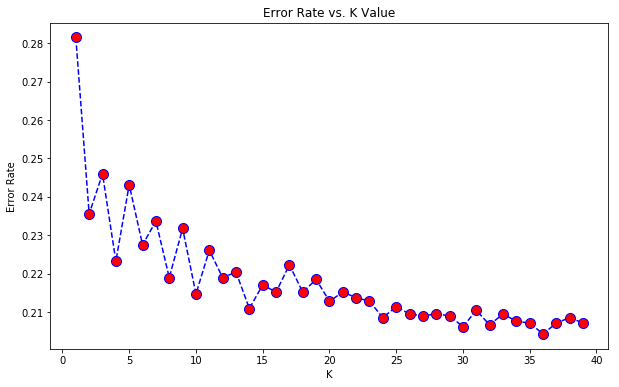

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [39]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[1393  187]
 [ 253  277]]


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1580
           1       0.60      0.52      0.56       530

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110

